In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. Data Preparation
# ------------------------------

# Load the CSV file into a DataFrame
Netflix_shows_movies = pd.read_csv('Netflix_shows_movies.csv')

# Display the first few rows of the dataset
print("Dataset Head:")
print(Netflix_shows_movies.head())


Dataset Head:
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release

In [2]:

# ------------------------------
# 2. Data Exploration (Initial)
# ------------------------------

# Display DataFrame information
print("\nDataset Info:")
print(Netflix_shows_movies.info())

# Display summary statistics for numerical and categorical columns
print("\nSummary Statistics:")
print(Netflix_shows_movies.describe(include='all'))

# Check for missing values
print("\nMissing Values Before Cleaning:")
print(Netflix_shows_movies.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", Netflix_shows_movies.duplicated().sum())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None

Summary Statistics:
             show_id   type      title                director  \
count   6.234000e+03   6234       6234                    4265   
unique           NaN      2       6172                    3301   
top          

In [3]:


# ------------------------------
# 3. Data Cleaning
# ------------------------------

# Fill missing values for some common columns.
# You can adjust the strategy for each column based on its importance.
if 'director' in Netflix_shows_movies.columns:
    Netflix_shows_movies['director'] = Netflix_shows_movies['director'].fillna("Unknown")
    
if 'cast' in Netflix_shows_movies.columns:
    Netflix_shows_movies['cast'] = Netflix_shows_movies['cast'].fillna("Unknown")
    
if 'country' in Netflix_shows_movies.columns:
    Netflix_shows_movies['country'] = Netflix_shows_movies['country'].fillna("Unknown")
    
if 'date_added' in Netflix_shows_movies.columns:
    # Fill missing date entries with a placeholder, then convert to datetime.
    Netflix_shows_movies['date_added'] = Netflix_shows_movies['date_added'].fillna("Unknown")
    # Convert to datetime where possible; errors will be set as NaT
    Netflix_shows_movies['date_added'] = pd.to_datetime(Netflix_shows_movies['date_added'], errors='coerce')
    
if 'rating' in Netflix_shows_movies.columns:
    Netflix_shows_movies['rating'] = Netflix_shows_movies['rating'].fillna("Unknown")

# Remove duplicate rows
Netflix_shows_movies.drop_duplicates(inplace=True)

# Optional: Clean up the "duration" column if it exists.
# The duration column might contain strings like "90 min" or "1 Season".
if 'duration' in Netflix_shows_movies.columns:
    # Extract the numeric part and the unit (e.g., 'min', 'Season')
    Netflix_shows_movies['duration_num'] = Netflix_shows_movies['duration'].str.extract(r'(\d+)').astype(float)
    Netflix_shows_movies['duration_unit'] = Netflix_shows_movies['duration'].str.extract(r'([a-zA-Z]+)')
    
# Check missing values after cleaning
print("\nMissing Values After Cleaning:")
print(Netflix_shows_movies.isnull().sum())




Missing Values After Cleaning:
show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added       651
release_year       0
rating             0
duration           0
listed_in          0
description        0
duration_num       0
duration_unit      0
dtype: int64


Date added has some missing values after cleaning but this will not interfere with our visualisations.

In [4]:


# ------------------------------
# 4. Data Exploration (Post-Cleaning)
# ------------------------------

# Display updated DataFrame information
print("\nCleaned Dataset Info:")
print(Netflix_shows_movies.info())

# Explore distribution of categorical columns using value counts
if 'rating' in Netflix_shows_movies.columns:
    print("\nRatings Distribution:")
    print(Netflix_shows_movies['rating'].value_counts())

if 'listed_in' in Netflix_shows_movies.columns:
    # 'listed_in' often contains multiple genres separated by commas.
    genres = Netflix_shows_movies['listed_in'].dropna().str.split(', ')
    genre_series = genres.explode()
    print("\nTop 10 Genres:")
    print(genre_series.value_counts().head(10))





Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        6234 non-null   int64         
 1   type           6234 non-null   object        
 2   title          6234 non-null   object        
 3   director       6234 non-null   object        
 4   cast           6234 non-null   object        
 5   country        6234 non-null   object        
 6   date_added     5583 non-null   datetime64[ns]
 7   release_year   6234 non-null   int64         
 8   rating         6234 non-null   object        
 9   duration       6234 non-null   object        
 10  listed_in      6234 non-null   object        
 11  description    6234 non-null   object        
 12  duration_num   6234 non-null   float64       
 13  duration_unit  6234 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), objec

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19332\3747303758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


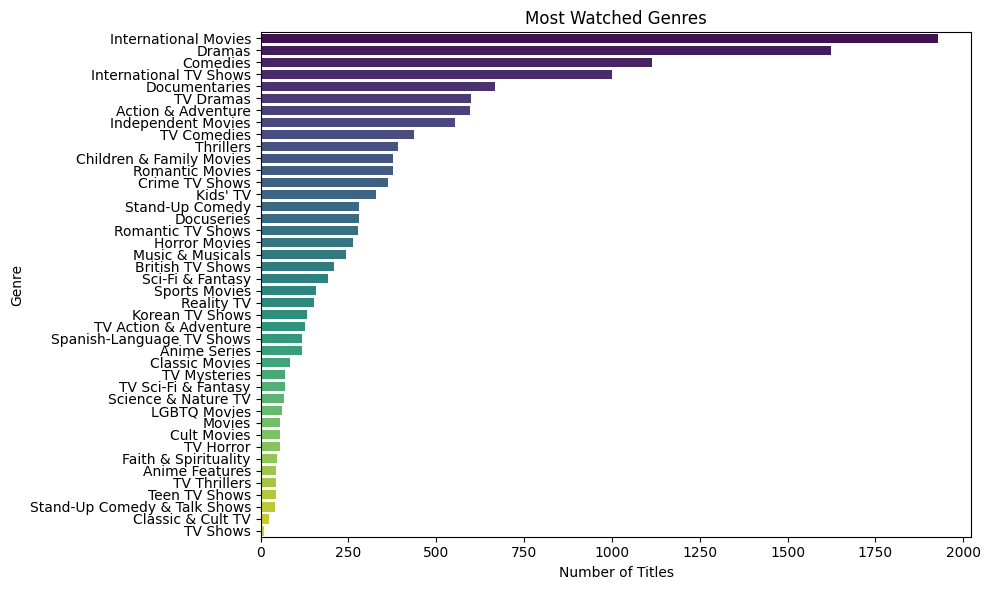

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19332\3747303758.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=Netflix_shows_movies, order=Netflix_shows_movies['rating'].value_counts().index, palette='magma')


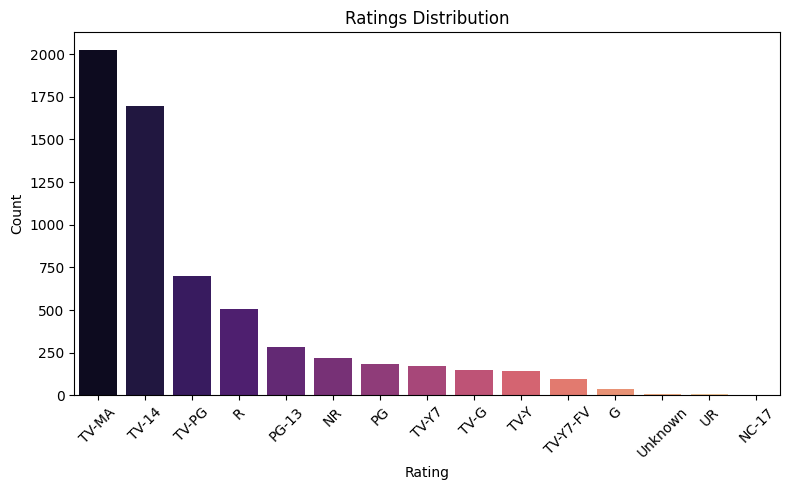

In [5]:

# ------------------------------
# 5. Data Visualization
# ------------------------------

# Visualization 1: Most Watched Genres
if 'listed_in' in Netflix_shows_movies.columns:
    genre_counts = genre_series.value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
    plt.title("Most Watched Genres")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'listed_in' not found in the dataset.")

# Visualization 2: Ratings Distribution
if 'rating' in Netflix_shows_movies.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='rating', data=Netflix_shows_movies, order=Netflix_shows_movies['rating'].value_counts().index, palette='magma')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'rating' not found in the dataset.")


# ------------------------------
# End of Script
# ------------------------------

# Save the cleaned DataFrame for future use
Netflix_shows_movies.to_csv("Netflix_shows_movies_cleaned.csv", index=False)
